#Project Title: Laptop Price Prediction for SmartTech Co.


#Project Overview:
SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

#Client's Objectives:
Accurate Pricing: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

Market Positioning: Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

Brand Influence: Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

#Key Challenges:
Diverse Specifications: The dataset encompasses laptops with diverse specifications. Our challenge is to build a model that generalizes well across a wide range of features.

Real-time Prediction: The model should have the capability to predict prices for newly released laptops, reflecting the fast-paced nature of the tech industry.

Interpretability: It is crucial to make the model interpretable, allowing SmartTech Co. to understand the rationale behind pricing predictions.

#Project Phases:

#Data Exploration and Understanding:

Dive into the dataset to understand the landscape of laptop specifications.

Visualize trends in laptop prices and identify potential influential features.

#Data Preprocessing:

Handle missing values, outliers, and encode categorical variables.

Ensure the dataset is ready for model training.

#Feature Engineering:

Extract meaningful features to enhance model performance.

Consider creating new features that capture the essence of laptop pricing.

#Model Development:

Employ machine learning algorithms such as Linear Regression, Random Forest, and Gradient Boosting to predict laptop prices.

Evaluate and choose the model that aligns best with the project's objectives.

#Hyperparameter Tuning:

Fine-tune the selected model to achieve optimal performance.

#Real-time Predictions:

Implement a mechanism for the model to make predictions for new laptops entering the market.

#Interpretability and Insights:

Uncover insights into which features play a pivotal role in pricing decisions.

Ensure that SmartTech Co. can interpret and trust the model's predictions.

#Client Presentation:

Present findings, model performance, and insights to SmartTech Co. stakeholders.

Address any questions or concerns and gather feedback for potential model improvements.

#Data Exploration and Understanding:

In [ ]:
#importng libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Load Dataset
df=pd.read_csv('C:/Users/VAIBHAV/Downloads/laptop.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
#Check Info Of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.shape

(1303, 13)

#Data Preprocessing:

In [ ]:
#Check the columna name
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
#Drop the unwanted columns
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
#Checking the null Value in the data set
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
#Droping Them
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Changing Datatype of the Ram Weight Inches

In [ ]:
#Changing the datatype of the ram
df['Ram']=df['Ram'].str.replace('GB','')
#Convert GB into the space
df['Ram']=df['Ram'].astype('int32')
#Change the datatype into int


In [ ]:
#Changing The data type of the Weigth
#Convert KG into the space
df['Weight']=df['Weight'].astype(str).str.replace('kg','')
#And we have ? in some columns then change it into space
df['Weight'] = df['Weight'].str.replace('?', '')
#After that change the space into the nan
df['Weight'] = df['Weight'].replace('', np.nan)
#And change the datatype into float
df['Weight']=df['Weight'].astype('float32')
#After the Fill The nan values with the mean of the weight
df['Weight']=df['Weight'].fillna(df['Weight'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 109.4+ KB


In [ ]:
#Changing The data type of the Inches
#And we have ? in some columns then change it into space
df['Inches']=df['Inches'].str.replace('?','')
#After that change the space into the nan
df['Inches'] = df['Inches'].replace('', np.nan)
#And change the datatype into float
df['Inches']=df['Inches'].astype('float')
#After the Fill The nan values with the mean of the Inches
df['Inches']=df['Inches'].fillna(df['Inches'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.4+ KB


#1. Bar Graph
Value count of all the company in our dataset  
Top 3 company
Lenovo , Dell , HP

<Axes: xlabel='Company'>

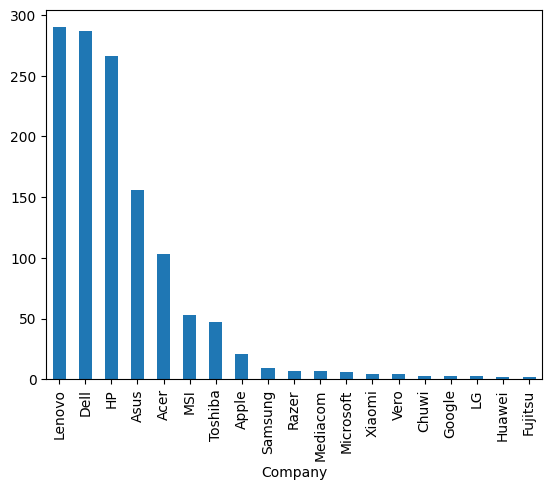

In [ ]:
df['Company'].value_counts().plot(kind='bar')

#2.Distribution of the price
This bell curve have Right-Skewed Distribution of the price it means our dataset have outliers.


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

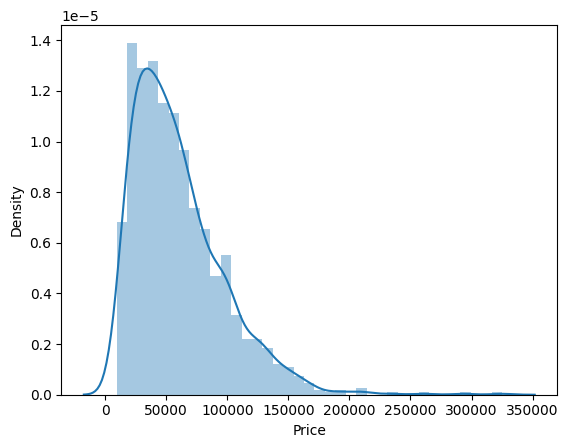

In [ ]:
sns.distplot(df['Price'])

# Barplot of the price and company
Razer sells the laptops on very high prices compare to others



C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\3701318224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Company'],y=df['Price'],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

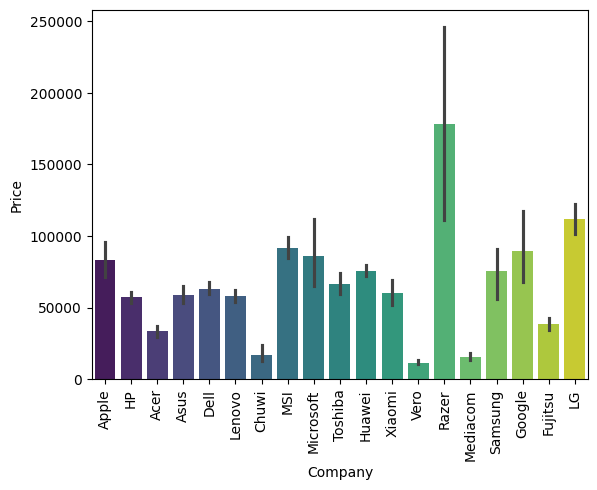

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'],palette='viridis')
plt.xticks(rotation='vertical')

# Barplot of
Value count of the typename of the laptops we have notebook type laptops in higher counts in our dataset

<Axes: xlabel='TypeName'>

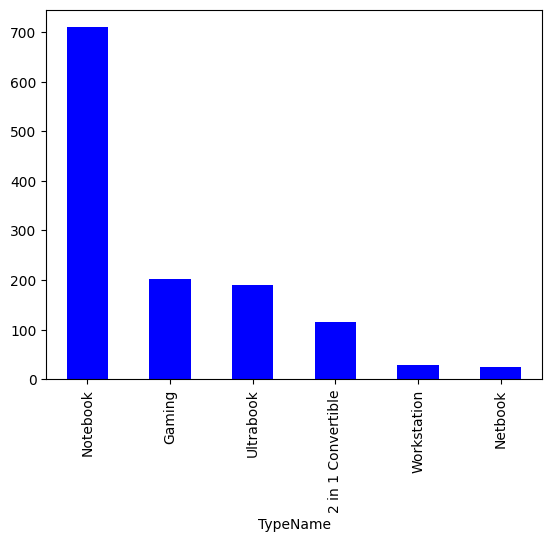

In [ ]:
df['TypeName'].value_counts().plot(kind='bar',color='blue')

#Barplot
of the typename and price  most expensive type name is the Workstation

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\2125842650.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['TypeName'],y=df['Price'],palette='viridis')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

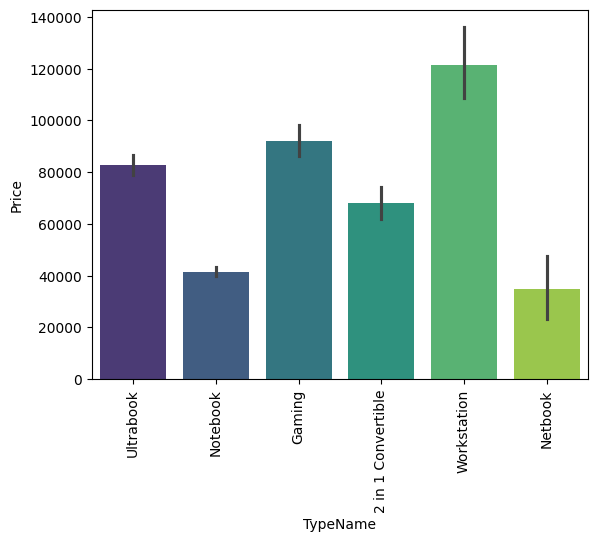

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'],palette='viridis')
plt.xticks(rotation='vertical')

# Distplot
 of the Inces most of the laptop have 16 inches Displays

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

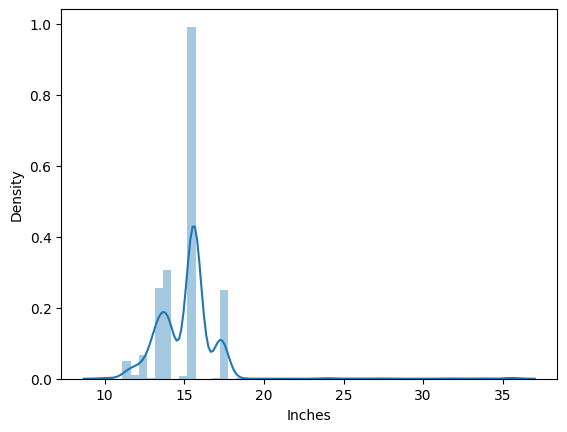

In [ ]:
sns.distplot(df['Inches'])

#Scatterplot
of the inches and Price
most expensive laptops have the screens of 15 to 17 inches

<Axes: xlabel='Inches', ylabel='Price'>

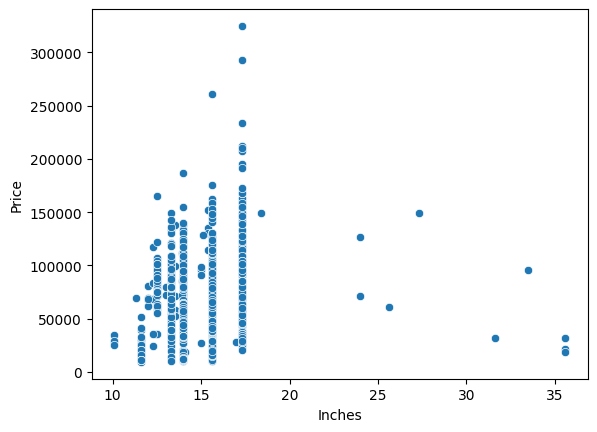

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

#Feature Engineering:

##Screen Analysis

In [ ]:
#Value count of the ScreenResolution
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

<Axes: xlabel='Touchscreen'>

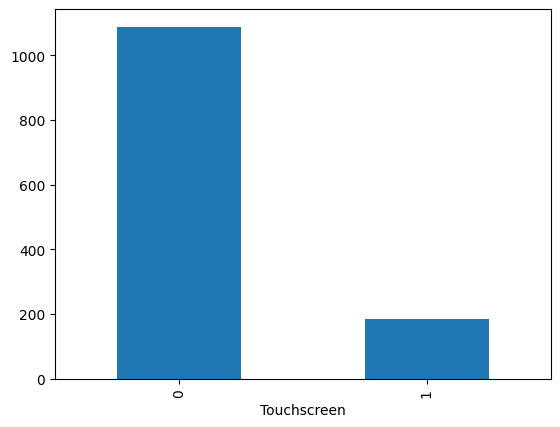

In [ ]:
#Creating the new column in our dataset for better understanding
#Column name is Touchscreen it has 0 and 1 0 for no touchscreen and 1 have touchscreen
#Creating a lambda function for doing this
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#Value count of the Touchscreen non touchscreen laptop are more then Touchscree
df['Touchscreen'].value_counts().plot(kind='bar')

# Barplot
of the screens and their prices
Touchscreens Are more expensive

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\1008628701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='tab20')


<Axes: xlabel='Touchscreen', ylabel='Price'>

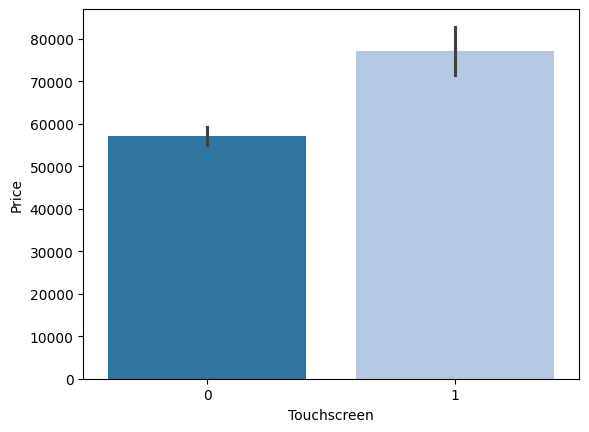

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='tab20')

<Axes: xlabel='IPS'>

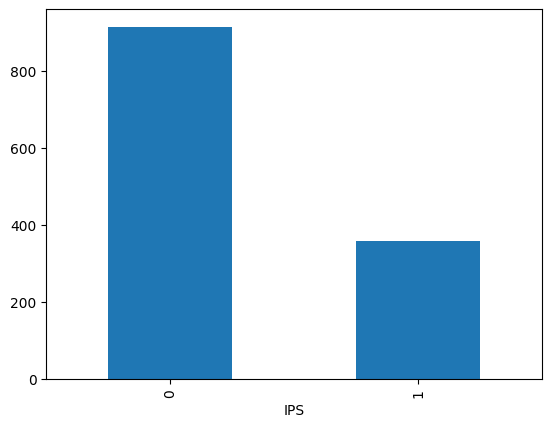

In [ ]:
#Creating the new column in our dataset for better understanding
#Column name is IPS it have 0 and 1 0 for no IPS panel and 1 have IPS panel
#Creating a lambda function for doing this
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
#Value count of the IPS non  IPS panel laptop are more then  IPS panel
df['IPS'].value_counts().plot(kind='bar')

#Barplot
of the IPS and the price Ips Panels are more expensive

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\2737504199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['IPS'],y=df['Price'],palette='tab20')


<Axes: xlabel='IPS', ylabel='Price'>

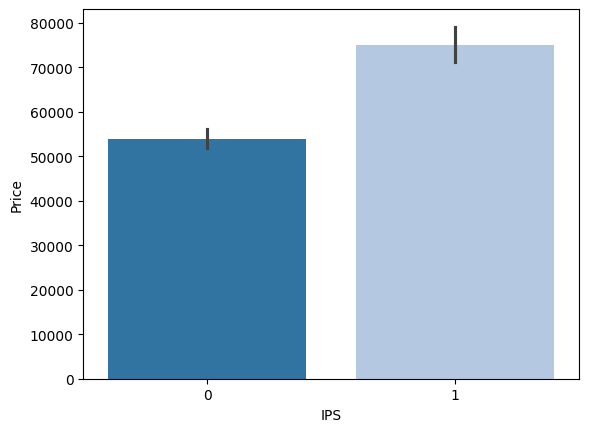

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'],palette='tab20')

In [ ]:
#Spliting the ScreenResolution into 2 part for the better analysis
#making a new variable new and also split the variabls into 2 part X and y res
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [ ]:
#X_res have some attached string so extract only the number from this
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
#Changing the datatype of the both x and y res into the int for getting our PPI values
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   int32  
 14  Y_res             1273 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.2+ KB


#PPI
 is a measurement of the number of pixels in a digital image or display per inch.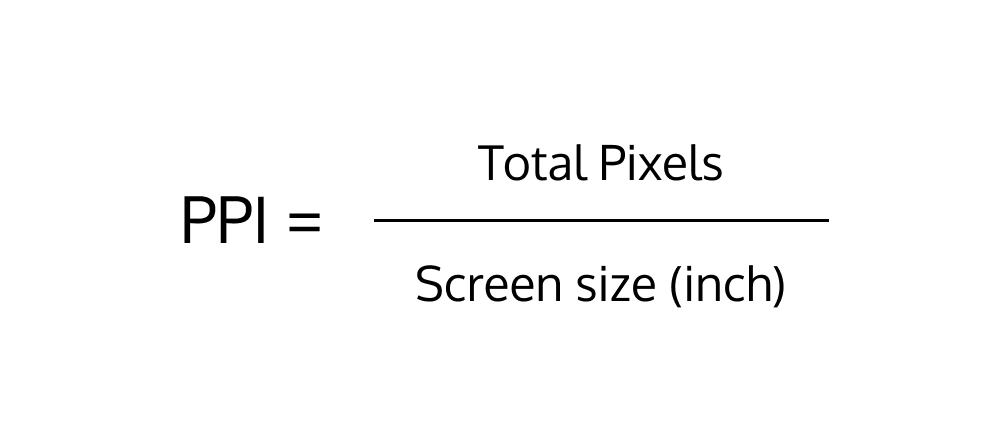

In [ ]:
#This help us to reduce the features of our model
df['Ppi']=(((df['X_res']**2)+ (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,Ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


<Axes: >

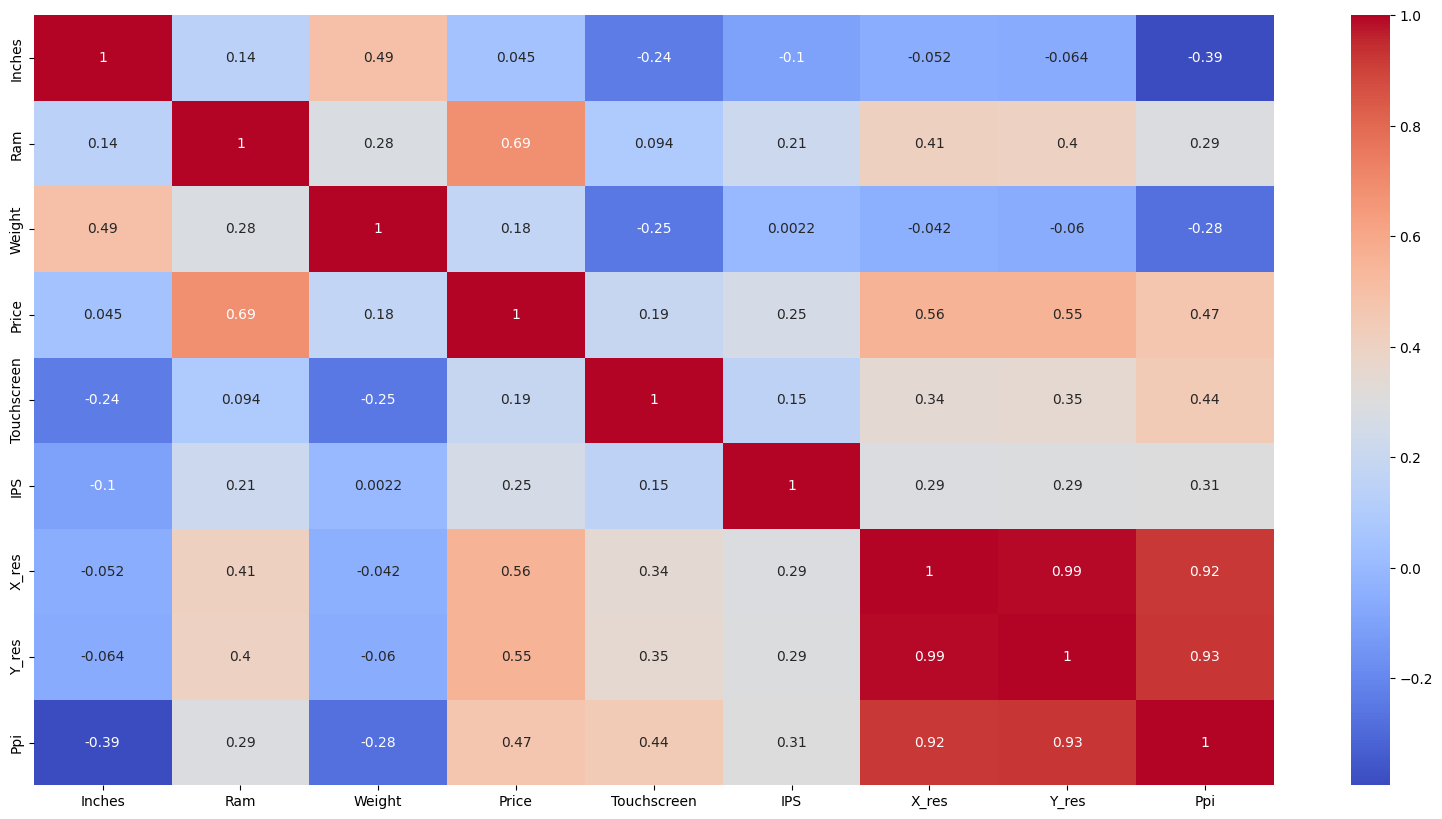

In [ ]:
numeric_df=df.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
# Xand Y res is positively correleted by the price

In [ ]:
#Drop ScreenResolution','X_res','Y_res becouse now we have PPI
df=df.drop(columns=['ScreenResolution','X_res','Y_res'])
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670


##CPU Analysis

In [ ]:
#Creating new column for Cpu and spliting names in new column and extracting the name of the CPU
df['Cpu_Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
#Creating new function and segregating the CPU Brand name and virsons
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
# segregating the CPU Brand name and virsons
df['Cpu_Brand']=df['Cpu_Name'].apply(fetch_processor)
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)
df


,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


#Barplot
of valuecount of the Cpu and the most used cpu in the laptop in i7

<Axes: xlabel='Cpu_Brand'>

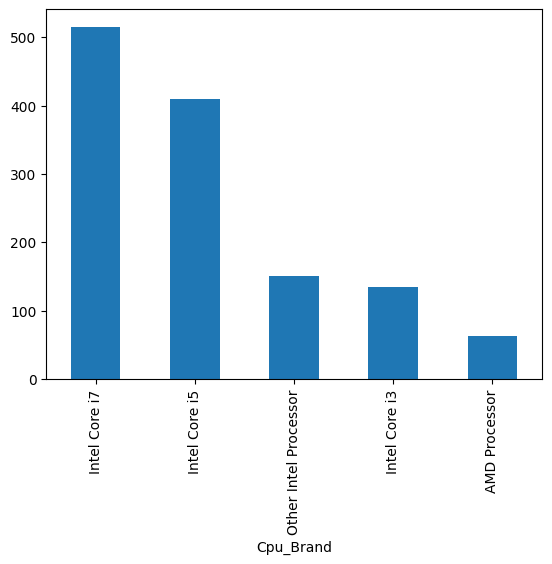

In [ ]:
df['Cpu_Brand'].value_counts().plot(kind='bar')

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\1986250525.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Cpu_Brand'],y=df['Price'],palette='tab20')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

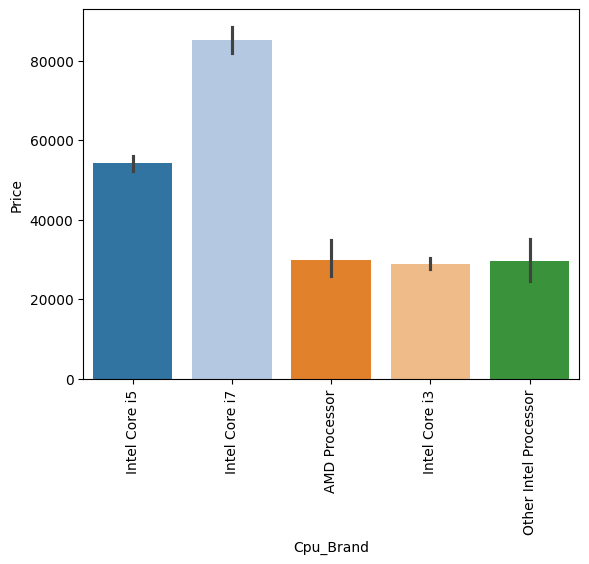

In [ ]:
# i7 is the more expensive then others
sns.barplot(x = df['Cpu_Brand'],y=df['Price'],palette='tab20')
plt.xticks(rotation='vertical')

# Ram Analysis

<Axes: xlabel='Ram'>

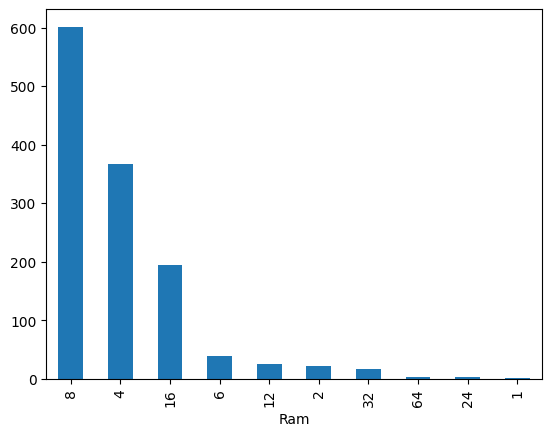

In [ ]:
# Most used ram is 8gb in the laptops
df['Ram'].value_counts().plot(kind='bar')

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\726188371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Ram'],y=df['Price'],palette='tab20')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '6'),
  Text(4, 0, '8'),
  Text(5, 0, '12'),
  Text(6, 0, '16'),
  Text(7, 0, '24'),
  Text(8, 0, '32'),
  Text(9, 0, '64')])

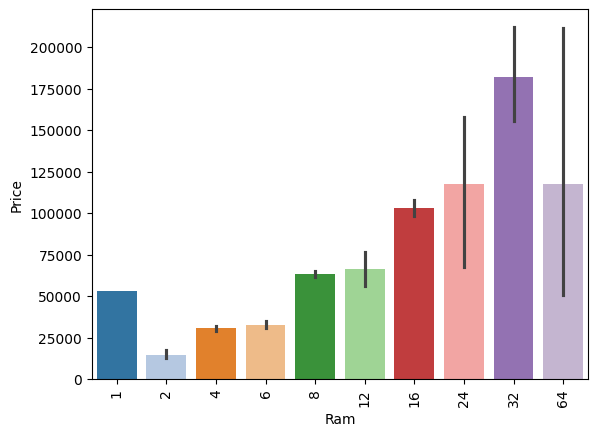

In [ ]:
# Most expensive rams are 64 and 32gb
import seaborn as sns
sns.barplot(x = df['Ram'],y=df['Price'],palette='tab20')
plt.xticks(rotation='vertical')

#Momory Analysis

In [ ]:
# Value count of the memory
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
# Here we are creating some new columns and and insert the momery's numeric value into these columns and drop some columns also
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split("+", n = 1, expand = True)
df['first']=new[0]
df['first']=df['first'].str.strip()

df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

# The following line was modified to replace all non-digit characters
df['first']=df['first'].str.replace(r'\D', '',regex=True)

df['second'].fillna("0", inplace = True)

df['Layer2HDD']=df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D', '',regex=True)
df['first'] = df['first'].replace('', '0')
df['second'] = df['second'].replace('', '0')

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\2615404716.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\2615404716.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0", inplace = True)


,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
951,Dell,Ultrabook,14.0,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,94572.00,0,0,157.350512,Intel Core i7,0,256,0,0
668,Toshiba,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,Windows 10,2.00,67026.24,0,1,141.211998,Intel Core i5,0,256,0,0
322,Asus,Notebook,14.0,8,256 SSD,Intel HD Graphics 620,Windows 10,2.00,58288.32,0,0,157.350512,Intel Core i7,0,256,0,0
1071,HP,Notebook,15.6,4,500 HDD,Intel HD Graphics 520,Windows 10,2.31,63882.72,0,0,100.454670,Intel Core i5,500,0,0,0
391,Asus,Gaming,17.3,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3.00,84768.48,0,0,127.335675,Intel Core i7,1000,256,0,0


In [ ]:
# Droping memory column
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
#Droping unnecessory columns
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# GPU Analysis

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
# Extracting the GPU Brand name
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<Axes: xlabel='Gpu_brand'>

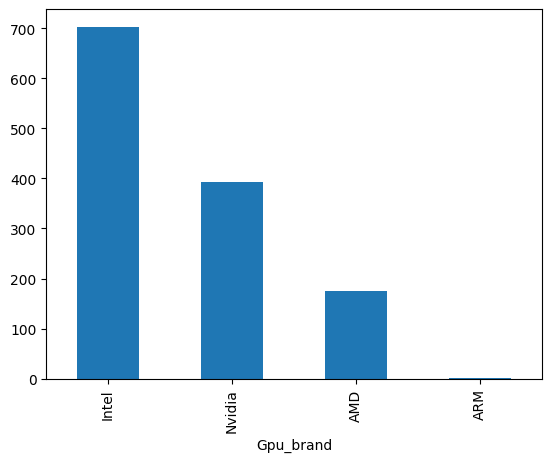

In [ ]:
# Most use GPU brand is Intel
df['Gpu_brand'].value_counts().plot(kind='bar')

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\2023357280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Gpu_brand'],y=df['Price'],palette='tab20')


([0, 1, 2, 3],
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'ARM')])

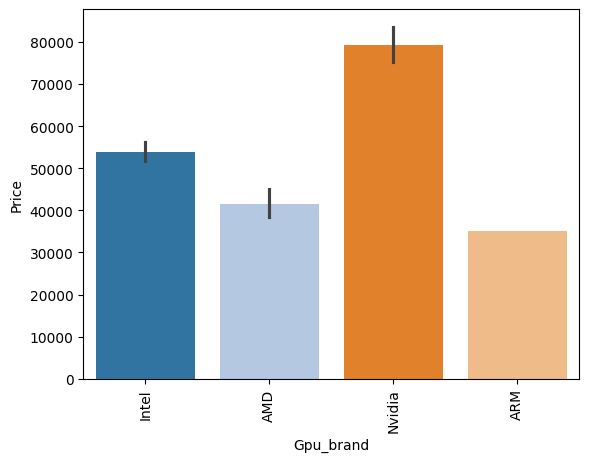

In [ ]:
# Most expensive Gpu Brand is Nvidia
sns.barplot(x = df['Gpu_brand'],y=df['Price'],palette='tab20')
plt.xticks(rotation='vertical')

In [ ]:
# Drop unimportant column
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# OS Analysis

<Axes: xlabel='OpSys'>

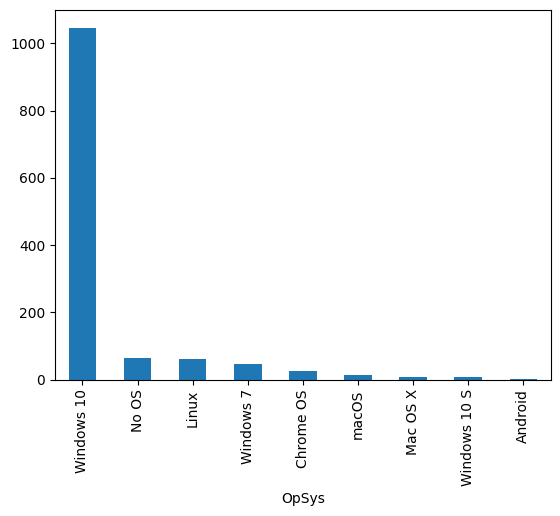

In [ ]:
# Most use os is window 10
df['OpSys'].value_counts().plot(kind='bar')

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\3541250558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['OpSys'],y=df['Price'],palette='tab20')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Windows 10 S'),
  Text(6, 0, 'Chrome OS'),
  Text(7, 0, 'Windows 7'),
  Text(8, 0, 'Android')])

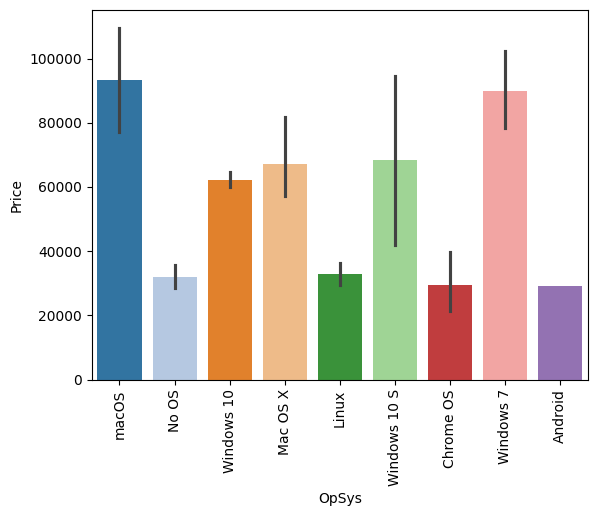

In [ ]:
# Most expensive os is Macos
sns.barplot(x = df['OpSys'],y=df['Price'],palette='tab20')
plt.xticks(rotation='vertical')

In [ ]:
# Creating a function for Extracting the os name
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
# Extracting the os name
df['cat_os'] = df['OpSys'].apply(cat_os)

In [ ]:
# Drop the unimportant column
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Gpu_brand,cat_os
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# Weight Analysis

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9360\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

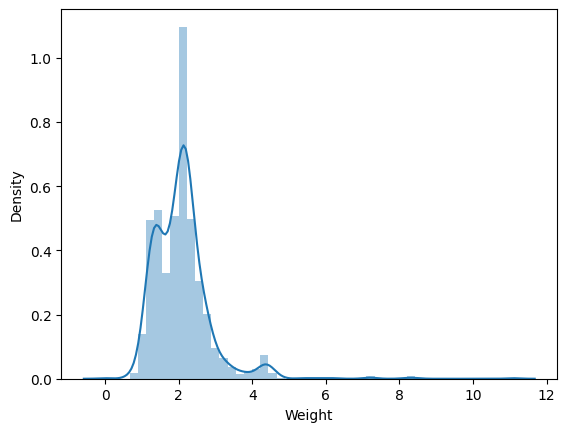

In [ ]:
# Most of the weight age 1 to 2 kg and we have also some outliers
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

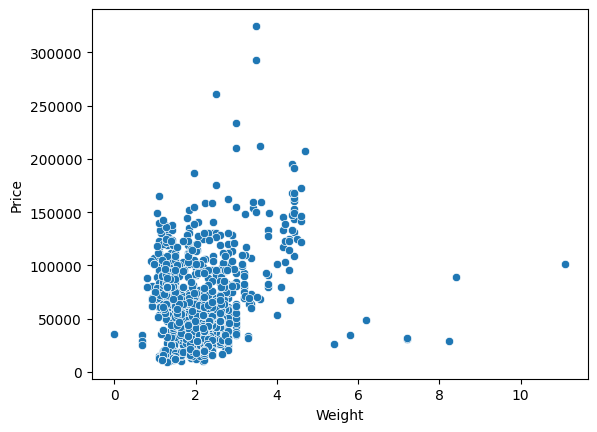

In [ ]:
# Correlation of the weight and price
sns.scatterplot(x=df['Weight'],y=df['Price'])

# Model Development:

In [ ]:
# Importing all Necessary Libraries
!pip install scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Creating the features and traget values
x=df.drop(columns=['Price'])
y=np.log(df['Price'])
# importing train and test and seprate the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Linear Regrasion Model

In [ ]:
# importing train and test and seprate the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Defining categorical_features for column_transformer
categorical_features=['Company','TypeName','Cpu_Brand','Gpu_brand','cat_os']
column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,drop='first'),categorical_features)],remainder='passthrough')
# Creating the pipeline
lr_model=Pipeline(steps=[('preprocessor',column_transformer),('model',LinearRegression())])
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7892249484019906
MAE 0.21756196971595876


# Random Forest Model

In [ ]:
# importing train and test and seprate the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Defining categorical_features for column_transformer
categorical_features=['Company','TypeName','Cpu_Brand','Gpu_brand','cat_os']
column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,drop='first'),categorical_features)],remainder='passthrough')
# Creating the pipeline
Rf_model=Pipeline(steps=[('preprocessor',column_transformer),('model',RandomForestRegressor())])
Rf_model.fit(x_train,y_train)
y_pred=Rf_model.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8609999762528036
MAE 0.1656188597669149


# Gradient Boosting Model

In [ ]:
# importing train and test and seprate the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Defining categorical_features for column_transformer
categorical_features=['Company','TypeName','Cpu_Brand','Gpu_brand','cat_os']
column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,drop='first'),categorical_features)],remainder='passthrough')
# Creating the pipeline
gb_model=Pipeline(steps=[('preprocessor',column_transformer),('model',GradientBoostingRegressor())])
gb_model.fit(x_train,y_train)
y_pred=gb_model.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8512932976246352
MAE 0.17949310024584533


# KNeighbors Model

In [ ]:
# importing train and test and seprate the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Defining categorical_features for column_transformer
categorical_features=['Company','TypeName','Cpu_Brand','Gpu_brand','cat_os']
column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,drop='first'),categorical_features)],remainder='passthrough')
# Creating the pipeline
Knn_model=Pipeline(steps=[('preprocessor',column_transformer),('Scaler',StandardScaler()),('model',KNeighborsRegressor(n_neighbors=5))])
Knn_model.fit(x_train,y_train)
y_pred=Knn_model.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7535764794326482
MAE 0.22172876038424552


# DecisionTree Model

In [ ]:
# importing train and test and seprate the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Defining categorical_features for column_transformer
categorical_features=x.select_dtypes(include='object').columns
column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,drop='first'),categorical_features)],remainder='passthrough')
# Creating the pipeline
DT_model=Pipeline(steps=[('preprocessor',column_transformer),('Scaler',StandardScaler()),('model',DecisionTreeRegressor())])
DT_model.fit(x_train,y_train)
y_pred=DT_model.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7657517483778662
MAE 0.21611950606955518


Best models are Random Forest Model with the r2 score of 0.8609999762528036
And Gradient Boosting Model with the r2 score of 0.8509999762528036

In [ ]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,Ppi,Cpu_Brand,HDD,SSD,Gpu_brand,cat_os
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# Real-time Prediction

In [ ]:
# Defining categorical_features and numerical_features for column_transformer
categorical_features=x.select_dtypes(include='object').columns
numerical_features=x.select_dtypes(exclude='object').columns
column_transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(),numerical_features),
    ('cat', OneHotEncoder(sparse_output=False,drop='first'),categorical_features)
],remainder='passthrough')
# Creating pipeline
Rf_model=Pipeline(steps=[('preprocessor',column_transformer),('model',RandomForestRegressor())])
Rf_model.fit(x_train,y_train)
# Creating new dataframe for prediction
new_laptop={'Company': 'Lenovo',
            'TypeName':'Notebook',
            'Inches':13.3,
            'Ram':16,
            'Weight':1.86,
            'Touchscreen':1,
            'IPS':1,
            'Ppi':250,
            'Cpu_Brand':'Intel Core i5',
            'HDD':0,
            'SSD':128,
            'Gpu_brand':'AMD',
            'cat_os':'Mac'}

new_laptop_df=pd.DataFrame([new_laptop])
new_laptop_df
#Predicting
prediction=Rf_model.predict(new_laptop_df)
p= np.exp(prediction)[0]
print('Your New Laptop Price is :',p)

Your New Laptop Price is : 96134.9900881439


# Interpretability and Insights
Uncover insights into which features play a pivotal role in pricing decisions.
features that are play pivotal role in pricing decisions are SSD,Company,Ram,TouchScreen,pip


# Questions to Explore

Which features have the most significant impact on laptop prices?
      
      
      Ans- features that are play pivotal role in pricing decisions are SSD,Company,Ram,TouchScreen,pip

Can the model accurately predict the prices of laptops from lesser-known brands?
     
     Ans- Accuracy may be low due to the scale of the data is low

Does the brand of the laptop significantly influence its price?


     Ans- Yes the brand of the laptop significantly influence its price

How well does the model perform on laptops with high-end specifications compared to budget laptops?
    
    
    Ans- Accuracy may be low due to the scale of the data is low and the type of the data if the train data have large data from the mediam varient laptor or or data set have large number of median varient pc so or model gives us low accuracy..

What are the limitations and challenges in predicting laptop prices accurately?



    Ans- Lack of the data and selected fetures may be give low accuracy..

How does the model perform when predicting the prices of newly released laptops not present in the training dataset?



     Ans- Its depand on the type of the model if we use the randomforest model Random Forest is a powerful ensemble learning algorithm that combines multiple decision trees to make predictions. It's particularly effective for regression tasks like predicting laptop prices. Here's a breakdown of how it works:
      1. Bootstrapping:
      Random Sampling: The algorithm randomly selects subsets (with replacement) from the training dataset. This process is called bootstrapping. Each subset is used to train a separate decision tree.
      2. Decision Tree Construction:
      Feature Selection: For each decision tree, a random subset of features is selected from the total number of features. This helps prevent overfitting by reducing the correlation between trees.
      Node Splitting: Each decision tree is constructed using a greedy algorithm that splits the data at each node based on a chosen feature and threshold. The split is chosen to maximize the homogeneity of the resulting child nodes.
      3. Prediction:
      Ensemble Voting: Once all decision trees are built, the model makes predictions by averaging the predictions from all trees. The final prediction is the average of the values predicted by each individual tree.
      4. Randomness:
      Bagging: The randomness in the bootstrapping process and feature selection ensures that the decision trees are diverse and not overly correlated. This helps reduce the variance of the model and improves its generalization performance.
      Take the data from the given dataset and predict the prices....

# Thankyou